In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

df = pd.read_csv("../data/raw/Loan_approval_data_2025.csv")   
df.head()

,customer_id,age,occupation_status,years_employed,annual_income,credit_score,credit_history_years,savings_assets,current_debt,defaults_on_file,delinquencies_last_2yrs,derogatory_marks,product_type,loan_intent,loan_amount,interest_rate,debt_to_income_ratio,loan_to_income_ratio,payment_to_income_ratio,loan_status
0,CUST100000,40,Employed,17.2,25579,692,5.3,895,10820,0,0,0,Credit Card,Business,600,17.02,0.423,0.023,0.008,1
1,CUST100001,33,Employed,7.3,43087,627,3.5,169,16550,0,1,0,Personal Loan,Home Improvement,53300,14.10,0.384,1.237,0.412,0
2,CUST100002,42,Student,1.1,20840,689,8.4,17,7852,0,0,0,Credit Card,Debt Consolidation,2100,18.33,0.377,0.101,0.034,1
3,CUST100003,53,Student,0.5,29147,692,9.8,1480,11603,0,1,0,Credit Card,Business,2900,18.74,0.398,0.099,0.033,1
4,CUST100004,32,Employed,12.5,63657,630,7.2,209,12424,0,0,0,Personal Loan,Education,99600,13.92,0.195,1.565,0.522,1


In [7]:
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   customer_id              50000 non-null  object 
 1   age                      50000 non-null  int64  
 2   occupation_status        50000 non-null  object 
 3   years_employed           50000 non-null  float64
 4   annual_income            50000 non-null  int64  
 5   credit_score             50000 non-null  int64  
 6   credit_history_years     50000 non-null  float64
 7   savings_assets           50000 non-null  int64  
 8   current_debt             50000 non-null  int64  
 9   defaults_on_file         50000 non-null  int64  
 10  delinquencies_last_2yrs  50000 non-null  int64  
 11  derogatory_marks         50000 non-null  int64  
 12  product_type             50000 non-null  object 
 13  loan_intent              50000 non-null  object 
 14  loan_amount           

In [8]:
df.describe(include="all")

,customer_id,age,occupation_status,years_employed,annual_income,credit_score,credit_history_years,savings_assets,current_debt,defaults_on_file,delinquencies_last_2yrs,derogatory_marks,product_type,loan_intent,loan_amount,interest_rate,debt_to_income_ratio,loan_to_income_ratio,payment_to_income_ratio,loan_status
count,50000,50000.000000,50000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000,50000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
unique,50000,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,6,NaN,NaN,NaN,NaN,NaN,NaN
top,CUST149983,NaN,Employed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Credit Card,Personal,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,34971,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22455,12429,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,34.957060,NaN,7.454868,50062.892040,643.614820,8.168274,3595.619400,14290.442220,0.053480,0.55464,0.147640,NaN,NaN,33041.874000,15.498591,0.285724,0.701999,0.233995,0.550460
std,NaN,11.118603,NaN,7.612097,32630.501014,64.731518,7.207552,13232.399398,13243.757493,0.224991,0.84505,0.412996,NaN,NaN,26116.185102,4.067942,0.159787,0.465788,0.155268,0.497452
min,NaN,18.000000,NaN,0.000000,15000.000000,348.000000,0.000000,0.000000,60.000000,0.000000,0.00000,0.000000,NaN,NaN,500.000000,6.000000,0.002000,0.008000,0.003000,0.000000
25%,NaN,26.000000,NaN,1.300000,27280.500000,600.000000,2.000000,130.000000,5581.000000,0.000000,0.00000,0.000000,NaN,NaN,12300.000000,12.180000,0.161000,0.333000,0.111000,0.000000
50%,NaN,35.000000,NaN,4.900000,41607.500000,643.000000,6.100000,568.000000,10385.000000,0.000000,0.00000,0.000000,NaN,NaN,26100.000000,15.440000,0.265000,0.622000,0.207000,1.000000
75%,NaN,43.000000,NaN,11.400000,62723.250000,687.000000,12.600000,2271.000000,18449.250000,0.000000,1.00000,0.000000,NaN,NaN,48500.000000,18.870000,0.389000,1.010250,0.337000,1.000000


In [9]:
df.isnull().sum().sort_values(ascending=False)

customer_id                0
age                        0
occupation_status          0
years_employed             0
annual_income              0
credit_score               0
credit_history_years       0
savings_assets             0
current_debt               0
defaults_on_file           0
delinquencies_last_2yrs    0
derogatory_marks           0
product_type               0
loan_intent                0
loan_amount                0
interest_rate              0
debt_to_income_ratio       0
loan_to_income_ratio       0
payment_to_income_ratio    0
loan_status                0
dtype: int64

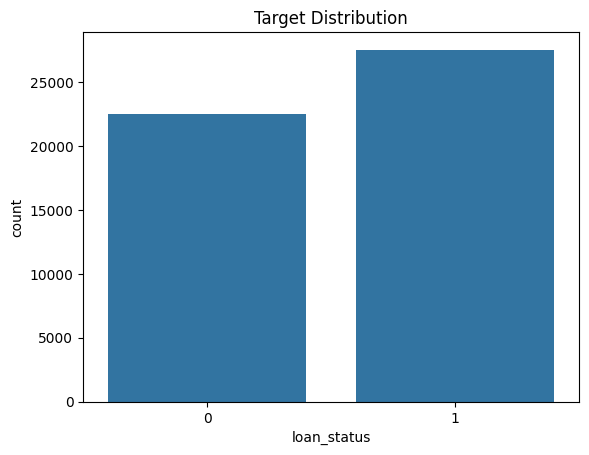

loan_status
1    0.55046
0    0.44954
Name: proportion, dtype: float64

In [12]:
sns.countplot(x=df['loan_status'])
plt.title("Target Distribution")
plt.show()

df['loan_status'].value_counts(normalize=True)